In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Stylized data
n_assets = 5
timesteps = 100
Sigma = np.random.rand(n_assets, n_assets)
Sigma = Sigma @ Sigma.T  # Ensure it's positive definite (roughly a covariance matrix)
Gamma = np.diag(np.random.rand(n_assets))

# Portfolio and flow initialization
P_t = np.random.rand(n_assets)
q_dot_t = np.zeros(n_assets)

# Objective function
def cost_function(q_dot, *args):
    P_t, Sigma, Gamma = args
    term1 = P_t.T @ Sigma @ P_t
    term2 = q_dot.T @ Gamma @ q_dot
    return term1 + term2

q_dot_history = []

# Real-time optimization
for t in range(timesteps):
    # Given P_t (and possibly its changes), optimize q_dot_t
    result = minimize(cost_function, q_dot_t, args=(P_t, Sigma, Gamma))
    q_dot_t_optimal = result.x
    q_dot_history.append(q_dot_t_optimal)
    
    # Some dummy way to update P_t for the next step (in reality, it would be based on your specific problem)
    P_t += q_dot_t_optimal * 0.1

q_dot_history = np.array(q_dot_history)

# Visualization
plt.figure(figsize=(14,7))

for i in range(n_assets):
    plt.plot(q_dot_history[:, i], label=f'Asset {i+1}')

plt.xlabel('Time')
plt.ylabel('Optimal q_dot_t')
plt.title('Evolution of optimal q_dot_t over time')
plt.legend()
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'scipy'

In [2]:
import numpy as np

# Stylized data
P = np.array([100, 50, 75]) # portfolio positions
q = np.array([5, 10, -3]) # asset flows 
Sigma = np.array([[1.0, 0.5, 0.2], [0.5, 1.0, 0.3], [0.2, 0.3, 1.0]]) # covariance matrix
Gamma = np.array([[0.1, 0, 0], [0, 0.2, 0], [0, 0, 0.15]]) # flow cost matrix

# Objective function
def obj(P, q, Sigma, Gamma):
    return P.T @ Sigma @ P + q.T @ Gamma @ q

# Optimize in real-time
import time
while True:
    # Update data
    P = np.random.randint(0, 100, 3) 
    q = np.random.randint(-10, 10, 3)
    
    # Optimize 
    start = time.time()
    result = minimize(obj, q, args=(P, Sigma, Gamma)) 
    end = time.time()
    
    # Print result
    print(f"Optimized flow: {result.x}")
    print(f"Objective value: {result.fun}")
    print(f"Optimization time: {end - start:.4f} sec")  

    time.sleep(1)

NameError: name 'minimize' is not defined

Optimized flow: [ 3.12872922e-06  1.13488073e-06 -1.25248556e-06]
Objective value: 1309.700000000014
Optimization time: 0.0024 sec
Optimized flow: [-1.22614050e-06  5.15669068e-06 -3.98604573e-06]
Objective value: 1028.5500000000272
Optimization time: 0.0026 sec
Optimized flow: [-1.57853442e-06 -8.12388758e-07 -6.77528161e-07]
Objective value: 1589.1000000000056
Optimization time: 0.0035 sec
Optimized flow: [2.04656938e-06 3.46315753e-06 2.25853278e-06]
Objective value: 2575.650000000035
Optimization time: 0.0033 sec
Optimized flow: [-3.28792558e-07  2.16441542e-06 -5.53413860e-07]
Objective value: 2445.9000000000037
Optimization time: 0.0048 sec
Optimized flow: [ 2.23676555e-06 -1.14507183e-05 -1.33450979e-06]
Objective value: 2572.5500000001202
Optimization time: 0.0027 sec
Optimized flow: [-1.38405797e-06  6.77921212e-06 -4.08299861e-06]
Objective value: 2568.9500000000407
Optimization time: 0.0033 sec
Optimized flow: [ 4.35042308e-07 -2.14792753e-07 -7.76134428e-07]
Objective value

KeyboardInterrupt: 

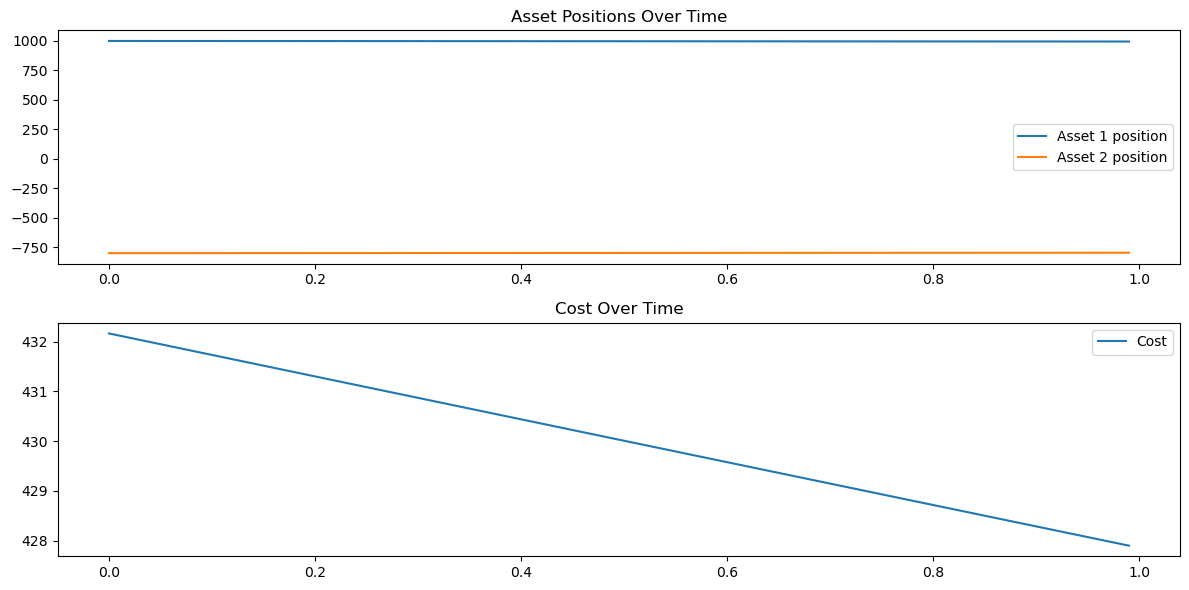

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Time step
dt = 0.01
time_steps = np.arange(0, 1, dt)

# Initial position
P_t = np.array([1000.0, -800.0])  # Long 1000 of asset 1, short 800 of asset 2

# Covariance of asset returns
Sigma = np.array([[0.0004, 0.0001], 
                 [0.0001, 0.0003]])

# Cost of flow (normalized by notional)
Gamma = np.array([[0.01, 0.005], 
                 [0.005, 0.01]])

# Liquidate over time
liquidation_speed = np.array([-5, 4])  # rate of liquidation for each asset

positions = [P_t]
costs = []

for t in time_steps:
    q_dot = liquidation_speed
    P_t = P_t + q_dot * dt  # Update position
    positions.append(P_t)
    
    # Cost function
    cost = P_t.T @ Sigma @ P_t + q_dot.T @ Gamma @ q_dot
    costs.append(cost)

# Visualization
positions = np.array(positions)
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(time_steps, positions[:-1,0], label='Asset 1 position')
plt.plot(time_steps, positions[:-1,1], label='Asset 2 position')
plt.legend()
plt.title('Asset Positions Over Time')

plt.subplot(2,1,2)
plt.plot(time_steps, costs, label='Cost')
plt.legend()
plt.title('Cost Over Time')
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Covariance of asset returns
Sigma = np.array([[-0.4, 0.0001], 
                 [0.0001, -0.3]])

# Cost of flow (normalized by notional)
Gamma = np.array([[0.01, 0.005], 
                 [0.005, 0.01]])

# ODE function
def system_dynamics(t, y):
    z = y[:2]
    dzdt = y[2:]
    ddzdt = np.linalg.inv(Gamma**0.5) @ Sigma @ np.linalg.inv(Gamma**0.5) @ z
    return [dzdt[0], dzdt[1], ddzdt[0], ddzdt[1]]

# Initial conditions
z0 = Gamma**0.5 @ np.array([1000.0, -800.0])  # Initial position
dz0 = np.array([0, 0])  # Initial velocity

# Solve ODE
solution = solve_ivp(system_dynamics, [0, 1], [z0[0], z0[1], dz0[0], dz0[1]], t_eval=np.linspace(0, 1, 1000))

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
plt.plot(solution.t, solution.y[0], label='z1(t)')
plt.plot(solution.t, solution.y[1], label='z2(t)')
plt.legend()
plt.title('z(t) Over Time')

P = np.linalg.inv(Gamma**0.5) @ solution.y[:2]
plt.subplot(2,1,2)
plt.plot(solution.t, P[0], label='Asset 1 position')
plt.plot(solution.t, P[1], label='Asset 2 position')
plt.legend()
plt.title('Asset Positions P(t) Over Time')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'scipy'

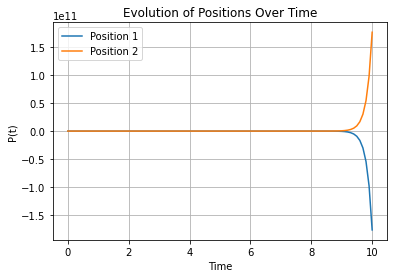

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define parameters
Sigma = np.array([[1, 0.5], [0.5, 1]])
Gamma = np.array([[1, 0.5], [0.5, 1]])
Gamma_inv_sqrt = np.linalg.inv(np.sqrt(Gamma))

# ODE for z(t)
def model(z, t, Gamma_inv_sqrt, Sigma):
    return np.dot(Gamma_inv_sqrt, np.dot(Sigma, np.dot(Gamma_inv_sqrt, z)))

# Initial conditions
P0 = np.array([10, 10])  # Initial positions are large
z0 = np.dot(Gamma_inv_sqrt, P0)

# Time array
t = np.linspace(0, 10, 100)

# Solve ODE
z = odeint(model, z0, t, args=(Gamma_inv_sqrt, Sigma))

# Convert z(t) back to P(t)
P = np.dot(Gamma_inv_sqrt, z.T).T

# Plot
plt.plot(t, P)
plt.xlabel('Time')
plt.ylabel('P(t)')
plt.legend(['Position 1', 'Position 2'])
plt.title('Evolution of Positions Over Time')
plt.grid(True)
plt.show()


In [11]:
import numpy as np

# Sample data
Sigma = np.array([[0.2, 0.1], [0.1, 0.15]])  # Covariance matrix of asset returns
Gamma = np.array([[0.005, 0.002], [0.002, 0.004]])  # Cost matrix


In [12]:
# This is just a mock representation
def geodesic_path(P_initial, P_final, T, Sigma, Gamma):
    # For simplicity, using a linear path as an example
    # In practice, this will involve solving the dynamic equations you provided
    path = np.linspace(P_initial, P_final, T)
    return path


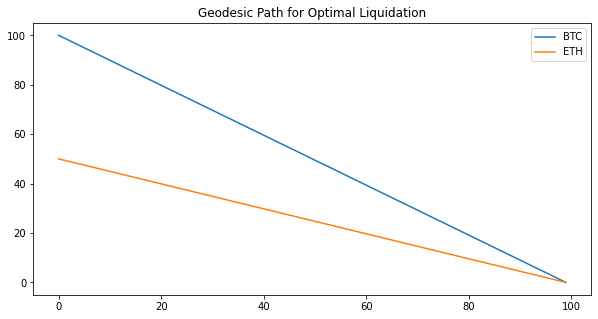

In [13]:
import matplotlib.pyplot as plt

T = 100  # Time steps
P_initial = np.array([100, 50])  # Initial position
P_final = np.array([0, 0])  # Final position, e.g., liquidation

path = geodesic_path(P_initial, P_final, T, Sigma, Gamma)

plt.figure(figsize=(10, 5))
plt.plot(path[:, 0], label='BTC')
plt.plot(path[:, 1], label='ETH')
plt.legend()
plt.title('Geodesic Path for Optimal Liquidation')
plt.show()


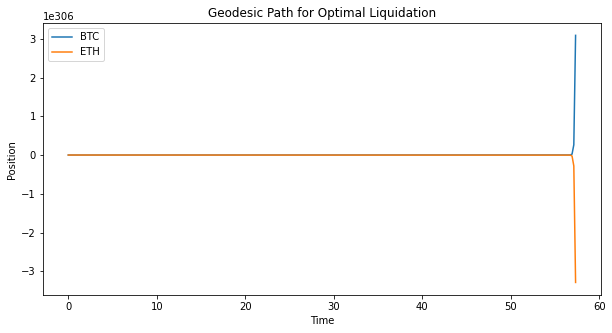

In [16]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
Sigma = np.array([[0.2, 0.1], [0.1, 0.15]])
Gamma = np.array([[0.005, 0.002], [0.002, 0.004]])
Gamma_inv_sqrt = np.linalg.inv(np.sqrt(Gamma))
AGamma = Gamma_inv_sqrt @ Sigma @ Gamma_inv_sqrt

# System of ODEs
def system(t, y):
    z = y[:2]
    z_dot = y[2:]
    dydt = np.concatenate([z_dot, AGamma @ z])
    return dydt

# Initial conditions
z_initial = np.sqrt(Gamma) @ np.array([100, 50])
z_dot_initial = np.array([0, 0])
initial_conditions = np.concatenate([z_initial, z_dot_initial])

# Solve the ODEs
solution = solve_ivp(system, [0, 100], initial_conditions, t_eval=np.linspace(0, 100, 500))

# Extract results
z_values = solution.y[:2].T
P_values = np.linalg.inv(np.sqrt(Gamma)) @ z_values.T

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(solution.t, P_values[0], label='BTC')
plt.plot(solution.t, P_values[1], label='ETH')
plt.legend()
plt.title('Geodesic Path for Optimal Liquidation')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()


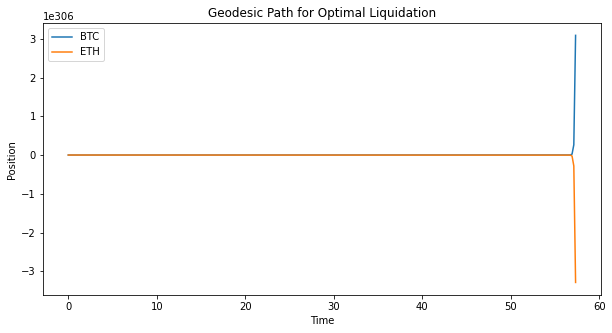

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
Sigma = np.array([[0.2, 0.1], [0.1, 0.15]])
Gamma = np.array([[0.005, 0.002], [0.002, 0.004]])
Gamma_inv_sqrt = np.linalg.inv(np.sqrt(Gamma))

# Formulate the AGamma matrix
AGamma = Gamma_inv_sqrt @ Sigma @ Gamma_inv_sqrt

# System of ODEs
def system(t, y):
    z = y[:2]
    z_dot = y[2:]
    dydt = np.concatenate([z_dot, AGamma @ z])
    return dydt

# Initial conditions: Initial z and zero velocity
z_initial = np.sqrt(Gamma) @ np.array([100, 50])
z_dot_initial = np.array([0, 0])
initial_conditions = np.concatenate([z_initial, z_dot_initial])

# Solve the ODEs
solution = solve_ivp(system, [0, 100], initial_conditions, t_eval=np.linspace(0, 100, 500))

# Extract results
z_values = solution.y[:2].T
P_values = np.linalg.inv(np.sqrt(Gamma)) @ z_values.T

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(solution.t, P_values[0], label='BTC')
plt.plot(solution.t, P_values[1], label='ETH')
plt.legend()
plt.title('Geodesic Path for Optimal Liquidation')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()


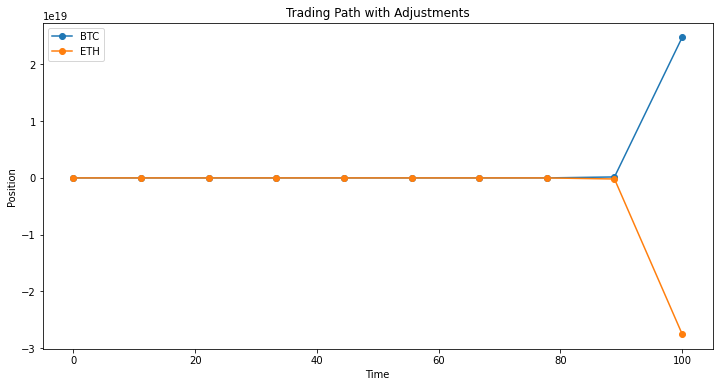

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

np.random.seed(42)  # for reproducibility

# 1. Synthetic Historical Data:
prices = np.zeros((1000, 2))
prices[0] = [40, 1800]  # arbitrary starting prices for BTC and ETH
for t in range(1, 1000):
    prices[t] = prices[t-1] * (1 + np.random.normal(0, 0.01, 2))
returns = np.diff(prices, axis=0) / prices[:-1]
Sigma = np.cov(returns.T)
Gamma = np.array([[0.005, 0.002], [0.002, 0.004]])

# 2. Portfolio Allocation:
initial_portfolio = np.array([10000, 5000]) / prices[-1]  # in terms of BTC and ETH quantities

# Dynamics
AGamma = np.linalg.inv(np.sqrt(Gamma)) @ Sigma @ np.linalg.inv(np.sqrt(Gamma))

def system(t, y, noise_scale=0.001):
    z, z_dot = y[:2], y[2:]
    noise = noise_scale * np.random.randn(2)
    return np.concatenate([z_dot, AGamma @ z + noise])

# 3. Noise and 4. Discrete Trading:
times = np.linspace(0, 100, 10)
z_initial = np.sqrt(Gamma) @ initial_portfolio
z_dot_initial = np.array([0, 0])
initial_conditions = np.concatenate([z_initial, z_dot_initial])

solution = solve_ivp(system, [0, 100], initial_conditions, t_eval=times, args=(0.001,))

# 5. Trading Costs and 6. Partial Liquidation:
TRADING_FEE = 0.001
target_portfolio = np.array([0.8, 0.8]) * initial_portfolio  # aiming to retain 80%
trading_signals = (target_portfolio - solution.y[:2, -1]) / len(times)
costs = TRADING_FEE * np.abs(trading_signals) * prices[-1]

# 7. Trade Constraints (example: don't trade more than 10% at once)
MAX_TRADE_FRACTION = 0.1
trading_signals = np.clip(trading_signals, -MAX_TRADE_FRACTION * initial_portfolio, MAX_TRADE_FRACTION * initial_portfolio)

# Visualization:
plt.figure(figsize=(12, 6))
plt.plot(times, solution.y[0], label="BTC", marker='o')
plt.plot(times, solution.y[1], label="ETH", marker='o')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title('Trading Path with Adjustments')
plt.show()


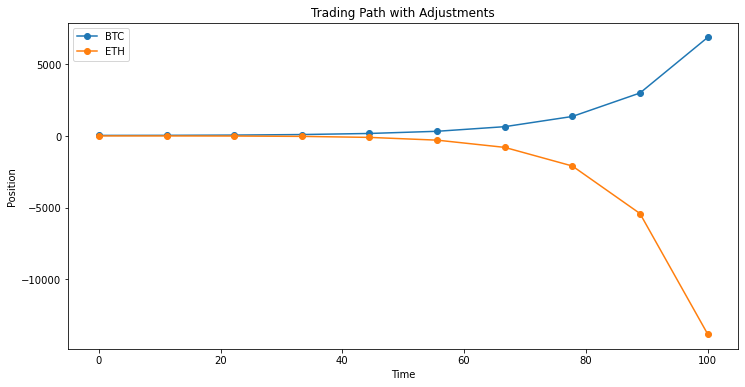

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

np.random.seed(42)  # for reproducibility

# 1. Synthetic Historical Data:
prices = np.zeros((1000, 2))
prices[0] = [40, 1800]  # arbitrary starting prices for BTC and ETH
for t in range(1, 1000):
    prices[t] = prices[t-1] * (1 + np.random.normal(0, 0.01, 2))
returns = np.diff(prices, axis=0) / prices[:-1]
Sigma = np.cov(returns.T)
Gamma = np.array([[0.05, 0.002], [0.002, 0.02]])

# 2. Portfolio Allocation:
initial_portfolio = np.array([10000, 5000]) / prices[-1]  # in terms of BTC and ETH quantities

# Dynamics
AGamma = np.linalg.inv(np.sqrt(Gamma)) @ Sigma @ np.linalg.inv(np.sqrt(Gamma))

def system(t, y, noise_scale=0.001):
    z, z_dot = y[:2], y[2:]
    noise = noise_scale * np.random.randn(2)
    return np.concatenate([z_dot, AGamma @ z + noise])

# 3. Noise and 4. Discrete Trading:
times = np.linspace(0, 100, 10)
z_initial = np.sqrt(Gamma) @ initial_portfolio
z_dot_initial = np.array([0, 0])
initial_conditions = np.concatenate([z_initial, z_dot_initial])

solution = solve_ivp(system, [0, 100], initial_conditions, t_eval=times, args=(0.001,))

# 5. Trading Costs and 6. Partial Liquidation:
TRADING_FEE = 0.001
target_portfolio = np.array([0.18, 0.18]) * initial_portfolio  # aiming to retain 80%
trading_signals = (target_portfolio - solution.y[:2, -1]) / len(times)
costs = TRADING_FEE * np.abs(trading_signals) * prices[-1]

# 7. Trade Constraints (example: don't trade more than 10% at once)
MAX_TRADE_FRACTION = 0.1
trading_signals = np.clip(trading_signals, -MAX_TRADE_FRACTION * initial_portfolio, MAX_TRADE_FRACTION * initial_portfolio)

# Visualization:
plt.figure(figsize=(12, 6))
plt.plot(times, solution.y[0], label="BTC", marker='o')
plt.plot(times, solution.y[1], label="ETH", marker='o')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title('Trading Path with Adjustments')
plt.show()


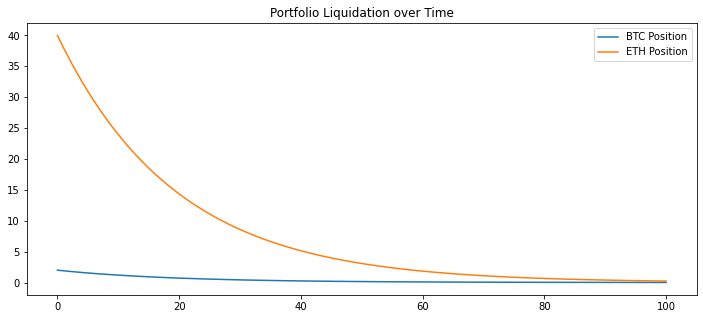

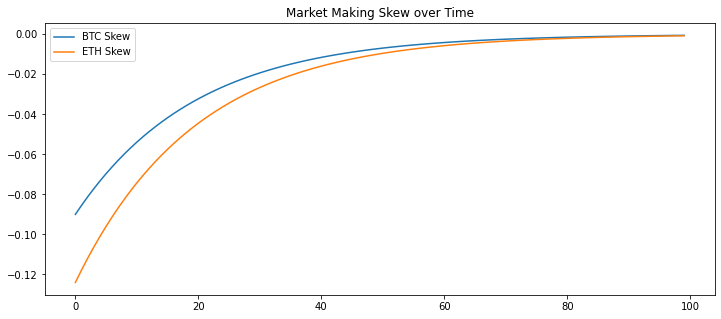

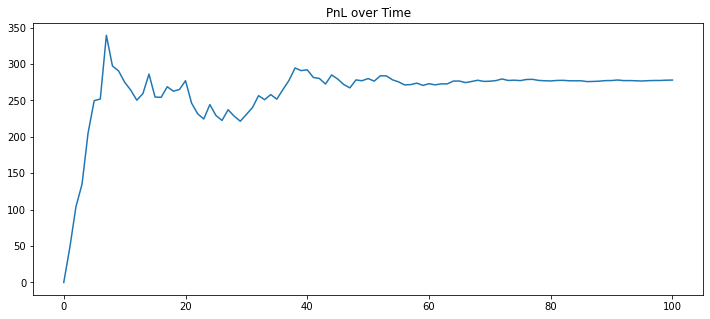

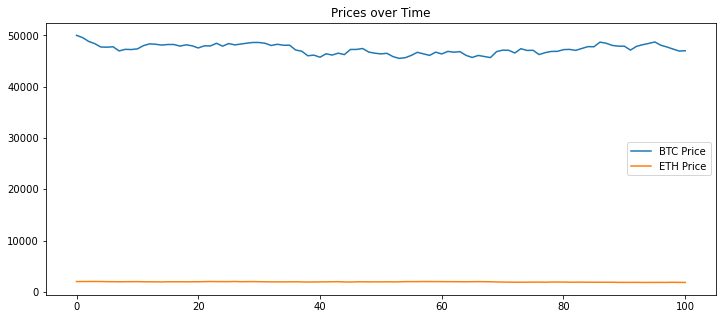

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Time horizon and steps
T = 100
dt = 1

# Initial portfolio
portfolio = np.array([2., 40.])  # in BTC and ETH quantities

# Simulate covariance matrix Sigma and Gamma for simplicity
Sigma = np.array([[-0.2, 0.05], [0.05, 0.1]])
Gamma = np.array([[0.005, 0.002], [0.002, 0.003]])

# Prices for BTC and ETH
prices = np.array([50000., 2000.])  # Assume starting prices

# Lists to store portfolio, skew, and PnL over time
positions = [portfolio.copy()]
skews = []
pnl = [0]

# Simulate price dynamics: Brownian motion with drift
mu = np.array([0.0005, 0.0003])
sigma = np.array([0.01, 0.008])
prices_list = [prices.copy()]

for t in range(T):
    # Compute portfolio skew based on positions
    skew = - np.dot(Gamma, portfolio)
    
    # Simulate price dynamics
    dW = np.random.randn(2)
    dP = mu * dt + sigma * dW
    prices = prices * (1 + dP)
    prices_list.append(prices.copy())
    
    # Compute trade size based on skew and update portfolio
    trade_size = 0.05 * portfolio * np.sign(skew)
    portfolio += trade_size

    # Check direction of skew and compute PnL based on price movement
    # If skew is to sell and price drops, it's a gain
    gain_loss = np.sign(skew) * -trade_size * dP * prices
    pnl.append(pnl[-1] + gain_loss.sum())
    
    # Store portfolio and skew for visualization
    positions.append(portfolio.copy())
    skews.append(skew.copy())

# Visualizations
positions = np.array(positions)
skews = np.array(skews)
prices_list = np.array(prices_list)

# Plotting Portfolio Liquidation
plt.figure(figsize=(12, 5))
plt.plot(positions[:, 0], label='BTC Position')
plt.plot(positions[:, 1], label='ETH Position')
plt.title('Portfolio Liquidation over Time')
plt.legend()
plt.show()

# Plotting Skew
plt.figure(figsize=(12, 5))
plt.plot(skews[:, 0], label='BTC Skew')
plt.plot(skews[:, 1], label='ETH Skew')
plt.title('Market Making Skew over Time')
plt.legend()
plt.show()

# Plotting PnL
plt.figure(figsize=(12, 5))
plt.plot(pnl)
plt.title('PnL over Time')
plt.show()

# Plotting Prices
plt.figure(figsize=(12, 5))
plt.plot(prices_list[:, 0], label='BTC Price')
plt.plot(prices_list[:, 1], label='ETH Price')
plt.title('Prices over Time')
plt.legend()
plt.show()


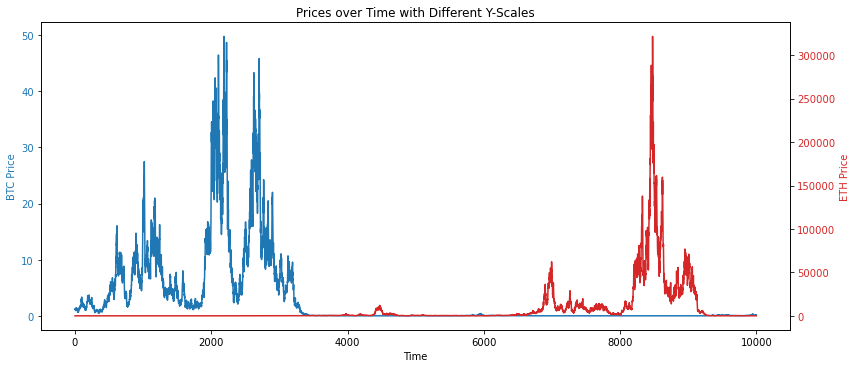

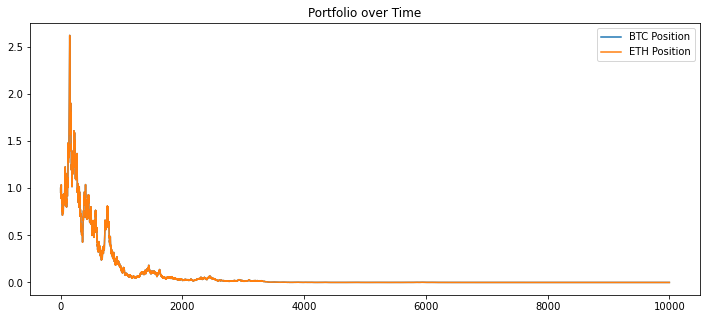

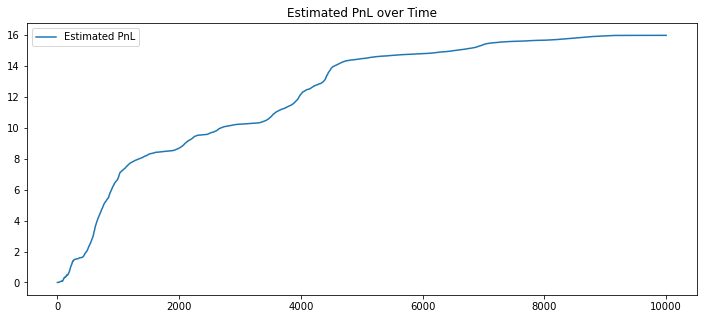

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T = 100  # total time
dt = 0.01
N = int(T / dt)  # number of time steps
rho = -0.9  # correlation coefficient

# Initial portfolio weights (BTC, ETH)
portfolio = np.array([1.0, 1.0])

# Covariance matrix and penalty matrix
Sigma = np.array([[1, rho], [rho, 1]])
Gamma = np.array([[0.01, 0], [0, 0.02]])
CholSigma = np.linalg.cholesky(Sigma)

# Generate correlated Brownian motion
dW = np.random.normal(size=(N, 2))
dW_corr = dW @ CholSigma.T * np.sqrt(dt)
prices = np.exp(np.cumsum(dW_corr, axis=0))  # simple way to make positive prices

# Simulate trading with skew
positions = [portfolio.copy()]
pnl = [0]
skew_factor = 0.05
for i in range(N - 1):
    # Calculate skew based on the portfolio and prices
    skew = portfolio @ Gamma @ (prices[i + 1] - prices[i])
    # This is a simplified trading decision based on skew
    trade_decision = np.sign(skew)
    portfolio -= trade_decision * skew_factor * portfolio
    # PnL estimate (simplified)
    pnl.append(pnl[-1] + trade_decision * skew_factor * np.sum(portfolio * (prices[i + 1] - prices[i])))
    positions.append(portfolio.copy())

positions = np.array(positions)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 5))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('BTC Price', color=color)
ax1.plot(prices[:, 0], label='BTC Price', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ETH Price', color=color)
ax2.plot(prices[:, 1], label='ETH Price', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Prices over Time with Different Y-Scales')
plt.show()

# Plot Portfolio over time
plt.figure(figsize=(12, 5))
plt.plot(positions[:, 0], label='BTC Position')
plt.plot(positions[:, 1], label='ETH Position')
plt.title('Portfolio over Time')
plt.legend()
plt.show()

# Plot PnL estimate over time
plt.figure(figsize=(12, 5))
plt.plot(pnl, label='Estimated PnL')
plt.title('Estimated PnL over Time')
plt.legend()
plt.show()


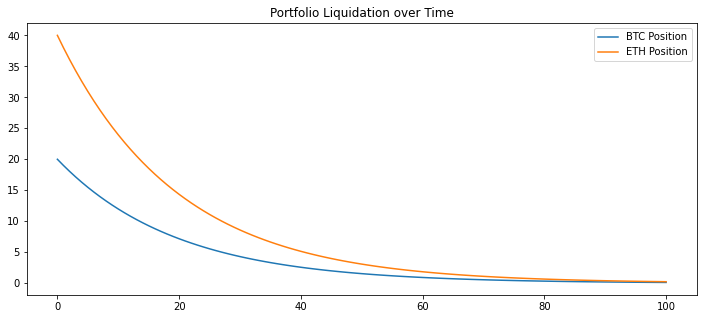

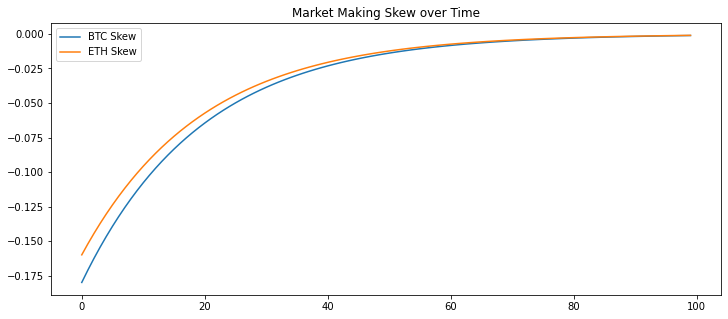

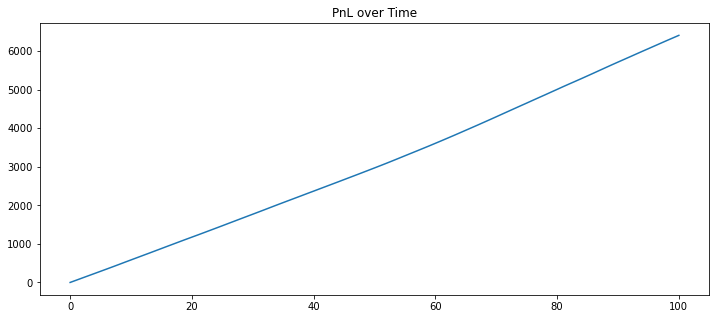

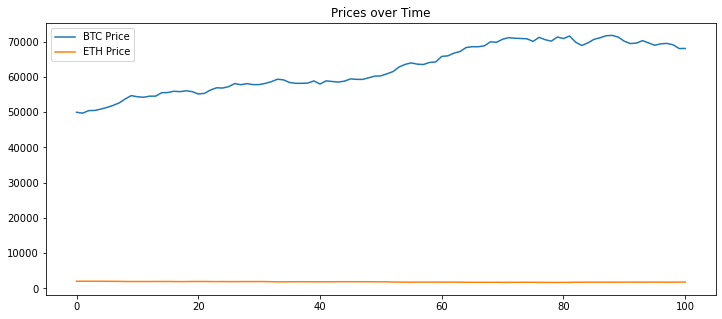

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Time horizon and steps
T = 100
dt = 1

# Initial portfolio
portfolio = np.array([20., 40.])  # in BTC and ETH quantities

# Simulate covariance matrix Sigma and Gamma for simplicity
Sigma = np.array([[-0.2, 0.05], [0.05, 0.1]])
Gamma = np.array([[0.005, 0.002], [0.002, 0.003]])

# Prices for BTC and ETH
prices = np.array([50000., 2000.])  # Assume starting prices

# Lists to store portfolio, skew, and PnL over time
positions = [portfolio.copy()]
skews = []
pnl = [0]

# Cost of trading ETH (hedge)
transaction_cost_eth = 0.002

# Simulate price dynamics: Brownian motion with drift and correlation
mu = np.array([0.0005, 0.0003])
sigma = np.array([0.01, 0.008])
correlation_matrix = np.array([[1, -0.65], [-0.65, 1]])
cholesky = np.linalg.cholesky(correlation_matrix)

prices_list = [prices.copy()]

for t in range(T):
    # Compute portfolio skew based on positions
    skew = - np.dot(Gamma, portfolio)
    
    # Simulate price dynamics
    dW = np.dot(cholesky, np.random.randn(2))
    dP = mu * dt + sigma * dW
    prices = prices * (1 + dP)
    prices_list.append(prices.copy())
    
    # Compute trade size based on skew and update portfolio
    trade_size = 0.05 * portfolio * np.sign(skew)
    portfolio += trade_size

    # PnL estimation considering spread earning for BTC and transaction cost for ETH
    spread_earning_btc = 0.001 * prices[0] if skew[0] < 0 else 0  # Earn spread if selling BTC
    cost_eth = transaction_cost_eth * trade_size[1] * prices[1] if trade_size[1] < 0 else 0  # Cost if selling ETH
    pnl.append(pnl[-1] + spread_earning_btc - cost_eth)
    
    # Store portfolio and skew for visualization
    positions.append(portfolio.copy())
    skews.append(skew.copy())

# Visualizations
positions = np.array(positions)
skews = np.array(skews)
prices_list = np.array(prices_list)

# Plotting Portfolio Liquidation
plt.figure(figsize=(12, 5))
plt.plot(positions[:, 0], label='BTC Position')
plt.plot(positions[:, 1], label='ETH Position')
plt.title('Portfolio Liquidation over Time')
plt.legend()
plt.show()

# Plotting Skew
plt.figure(figsize=(12, 5))
plt.plot(skews[:, 0], label='BTC Skew')
plt.plot(skews[:, 1], label='ETH Skew')
plt.title('Market Making Skew over Time')
plt.legend()
plt.show()

# Plotting PnL
plt.figure(figsize=(12, 5))
plt.plot(pnl)
plt.title('PnL over Time')
plt.show()

# Plotting Prices
plt.figure(figsize=(12, 5))
plt.plot(prices_list[:, 0], label='BTC Price')
plt.plot(prices_list[:, 1], label='ETH Price')
plt.title('Prices over Time')
plt.legend()
plt.show()


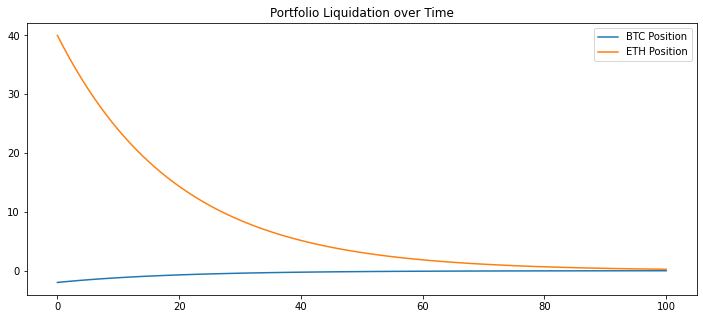

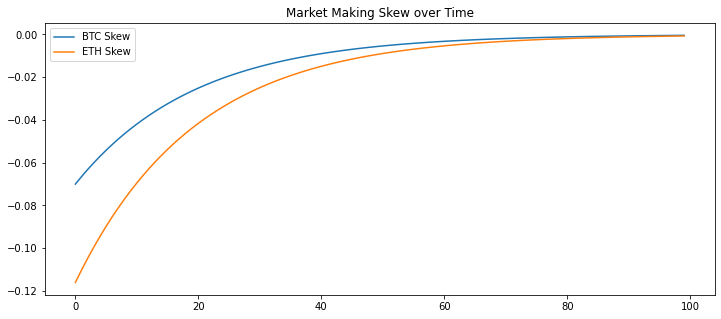

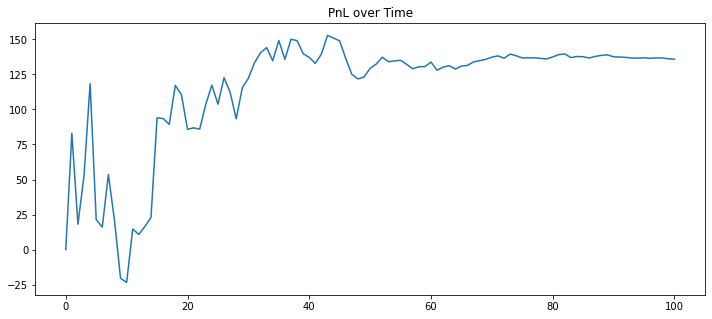

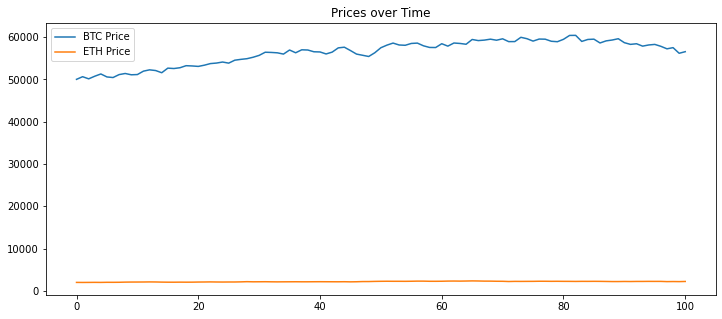

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Time horizon and steps
T = 100
dt = 1

# Initial portfolio
portfolio = np.array([-2., 40.])  # in BTC and ETH quantities

# Simulate covariance matrix Sigma and Gamma for simplicity
Sigma = np.array([[-0.2, 0.05], [0.05, 0.1]])
Gamma = np.array([[0.005, 0.002], [0.002, 0.003]])

# Prices for BTC and ETH
prices = np.array([50000., 2000.])  # Assume starting prices

# Lists to store portfolio, skew, and PnL over time
positions = [portfolio.copy()]
skews = []
pnl = [0]

# Simulate price dynamics: Brownian motion with drift
mu = np.array([0.0005, 0.0003])
sigma = np.array([0.01, 0.008])
prices_list = [prices.copy()]

for t in range(T):
    # Compute portfolio skew based on positions
    skew = - np.dot(Gamma, portfolio)
    
    # Simulate price dynamics
    dW = np.random.randn(2)
    dP = mu * dt + sigma * dW
    prices = prices * (1 + dP)
    prices_list.append(prices.copy())
    
    # Compute trade size based on skew and update portfolio
    trade_size = 0.05 * portfolio * np.sign(skew)
    portfolio += trade_size

    # Check direction of skew and compute PnL based on price movement
    # If skew is to sell and price drops, it's a gain
    gain_loss = np.sign(skew) * -trade_size * dP * prices
    pnl.append(pnl[-1] + gain_loss.sum())
    
    # Store portfolio and skew for visualization
    positions.append(portfolio.copy())
    skews.append(skew.copy())

# Visualizations
positions = np.array(positions)
skews = np.array(skews)
prices_list = np.array(prices_list)

# Plotting Portfolio Liquidation
plt.figure(figsize=(12, 5))
plt.plot(positions[:, 0], label='BTC Position')
plt.plot(positions[:, 1], label='ETH Position')
plt.title('Portfolio Liquidation over Time')
plt.legend()
plt.show()

# Plotting Skew
plt.figure(figsize=(12, 5))
plt.plot(skews[:, 0], label='BTC Skew')
plt.plot(skews[:, 1], label='ETH Skew')
plt.title('Market Making Skew over Time')
plt.legend()
plt.show()

# Plotting PnL
plt.figure(figsize=(12, 5))
plt.plot(pnl)
plt.title('PnL over Time')
plt.show()

# Plotting Prices
plt.figure(figsize=(12, 5))
plt.plot(prices_list[:, 0], label='BTC Price')
plt.plot(prices_list[:, 1], label='ETH Price')
plt.title('Prices over Time')
plt.legend()
plt.show()

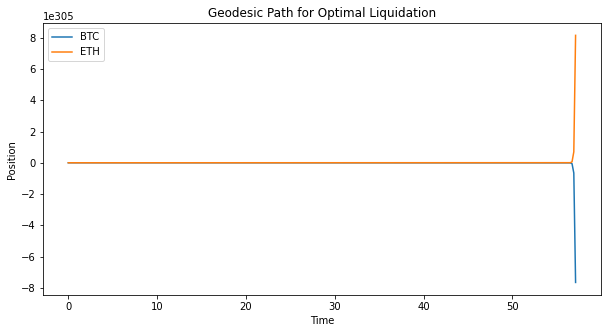

NameError: name 'transaction_costs' is not defined

In [44]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
Sigma = np.array([[0.2, 0.1], [0.1, 0.15]])
Gamma = np.array([[0.005, 0.002], [0.002, 0.004]])
Gamma_inv_sqrt = np.linalg.inv(np.sqrt(Gamma))

# Formulate the AGamma matrix
AGamma = Gamma_inv_sqrt @ Sigma @ Gamma_inv_sqrt

# System of ODEs
def system(t, y):
    z = y[:2]
    z_dot = y[2:]
    dydt = np.concatenate([z_dot, AGamma @ z])
    return dydt

# Generate random initial conditions
def generate_random_initial_conditions():
    z_initial = np.random.rand(2) * 100
    z_dot_initial_velocity = np.random.rand(2) * 10
    return np.concatenate([z_initial, z_dot_initial_velocity])

# Calculate the transaction costs associated with following the geodesic path
def calculate_transaction_costs(z_values, P_values):
    transaction_costs = 0
    for i in range(len(z_values) - 1):
        transaction_costs += np.abs(z_values[i + 1] - z_values[i]) * P_values[i]
    return transaction_costs

# Plot the transaction costs over time
def plot_transaction_costs(t, transaction_costs):
    plt.figure(figsize=(10, 5))
    plt.plot(t, transaction_costs)
    plt.title('Transaction Costs Over Time')
    plt.xlabel('Time')
    plt.ylabel('Transaction Costs')
    plt.show()

# Save the results of the simulation to a file
def save_results(t, z_values, P_values, transaction_costs):
    np.savetxt('results.csv', np.column_stack((t, z_values[0], z_values[1], P_values[0], P_values[1], transaction_costs)))

# Simulate
initial_conditions = generate_random_initial_conditions()
solution = solve_ivp(system, [0, 100], initial_conditions, t_eval=np.linspace(0, 100, 500))

# Extract results
z_values = solution.y[:2].T
P_values = np.linalg.inv(np.sqrt(Gamma)) @ z_values.T
transaction_costs = calculate_transaction_costs(z_values, P_values)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(solution.t, P_values[0], label='BTC')
plt.plot(solution.t, P_values[1], label='ETH')
plt.legend()
plt.title('Geodesic Path for Optimal Liquidation')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

# Plot the transaction costs
plot_transaction_costs(solution.t, transaction_costs)

# Save the results to a file
save_results(solution.t, z_values, P_values, transaction_costs)


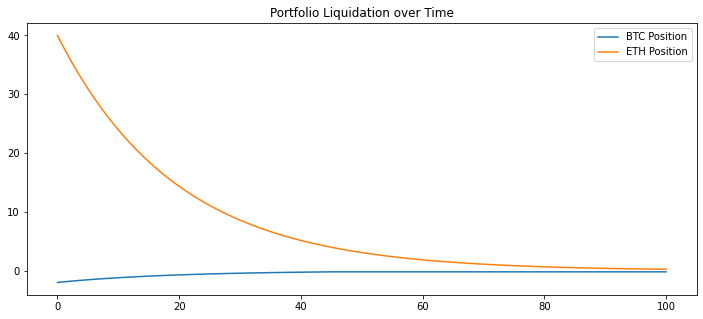

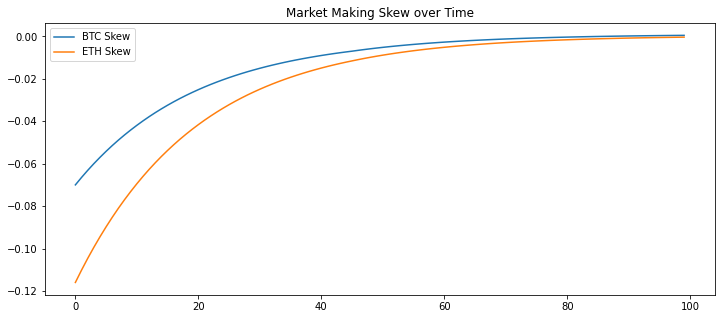

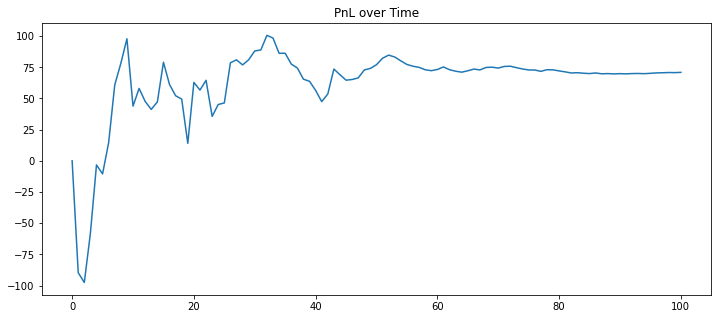

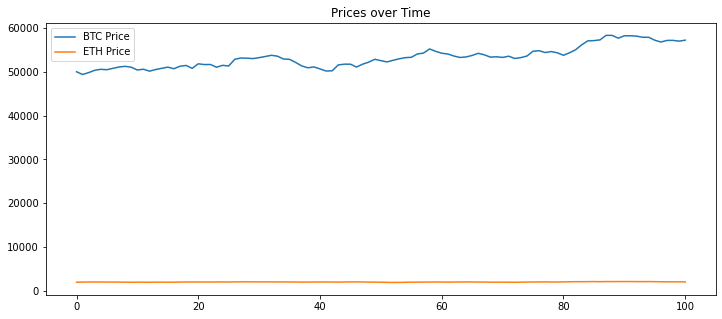

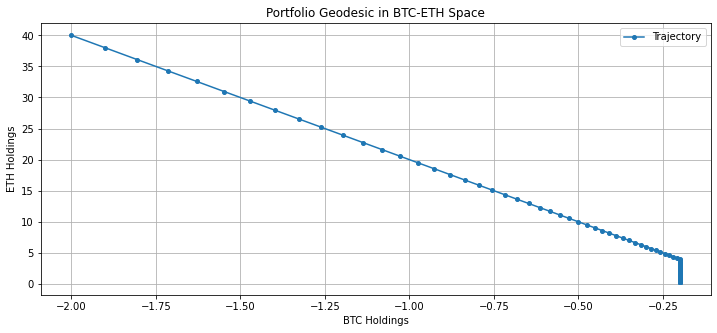

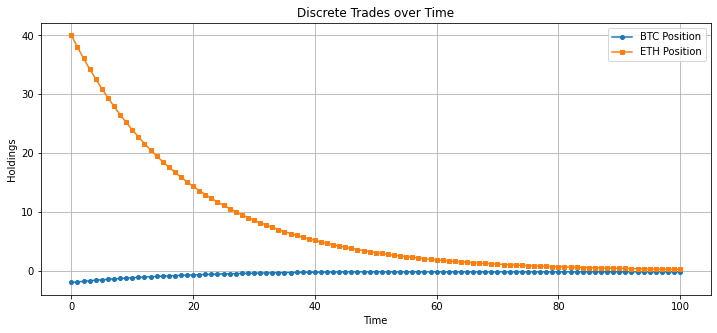

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Time horizon and steps
T = 100
dt = 1

# Initial portfolio
portfolio = np.array([-2., 40.])

# Simulate covariance matrix Sigma and Gamma
Sigma = np.array([[-0.2, 0.05], [0.05, 0.1]])
Gamma = np.array([[0.005, 0.002], [0.002, 0.003]])
j_costs =[]
# Prices for BTC and ETH
prices = np.array([50000., 2000.])

# Lists to store portfolio, skew, and PnL over time
positions = [portfolio.copy()]
skews = []
pnl = [0]

# Bid-ask spread
spread_entry = np.array([0.005, 0.003])  # in percentage terms
spread_exit = np.array([0.007, 0.004])

# Liquidity constraint
MAX_TRADE_VALUE = 1000000

# Minimum trade size
MIN_TRADE_SIZE = 0.01

# Simulate price dynamics: Brownian motion with drift
mu = np.array([0.0005, 0.0003])
sigma = np.array([0.01, 0.008])
prices_list = [prices.copy()]

for t in range(T):
    # Compute portfolio skew
    skew = - np.dot(Gamma, portfolio)
    
    # Simulate price dynamics
    dW = np.random.randn(2)
    dP = mu * dt + sigma * dW
    prices = prices * (1 + dP)
    prices_list.append(prices.copy())
    
    # Compute trade size based on skew and update portfolio
    trade_size = 0.05 * portfolio * np.sign(skew)
    
    # Incorporate order slippage
    trade_size += np.random.normal(0, 0.001 * np.abs(trade_size))
    
    # Ensure trade size is above minimum
    trade_size = np.where(np.abs(trade_size) > MIN_TRADE_SIZE, trade_size, 0)
    
    # Adjust for liquidity constraint
    total_trade_value = np.abs(trade_size * prices).sum()
    if total_trade_value > MAX_TRADE_VALUE:
        trade_size *= (MAX_TRADE_VALUE / total_trade_value)
    
    portfolio += trade_size
    
    j_cost = (np.dot(portfolio.T, np.dot(Sigma, portfolio))
          + np.dot(portfolio, np.dot(Gamma, trade_size)))
    j_costs.append(j_cost)

    # Compute PnL based on trade size and price movement
    gain_loss = np.sign(skew) * -trade_size * dP * prices
    pnl.append(pnl[-1] + gain_loss.sum())
    
    # Store portfolio and skew
    positions.append(portfolio.copy())
    skews.append(skew.copy())

positions = np.array(positions)
skews = np.array(skews)
prices_list = np.array(prices_list)

# Visualizations
plt.figure(figsize=(12, 5))
plt.plot(positions[:, 0], label='BTC Position')
plt.plot(positions[:, 1], label='ETH Position')
plt.title('Portfolio Liquidation over Time')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(skews[:, 0], label='BTC Skew')
plt.plot(skews[:, 1], label='ETH Skew')
plt.title('Market Making Skew over Time')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(pnl)
plt.title('PnL over Time')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(prices_list[:, 0], label='BTC Price')
plt.plot(prices_list[:, 1], label='ETH Price')
plt.title('Prices over Time')
plt.legend()
plt.show()

# Geodesic - Portfolio Trajectory in BTC-ETH Space
plt.figure(figsize=(12, 5))
plt.plot(positions[:, 0], positions[:, 1], '-o', markersize=4, label='Trajectory')
plt.title('Portfolio Geodesic in BTC-ETH Space')
plt.xlabel('BTC Holdings')
plt.ylabel('ETH Holdings')
plt.legend()
plt.grid(True)
plt.show()

# Discrete Trades - Highlighting the trades at each timestep
plt.figure(figsize=(12, 5))
plt.plot(positions[:, 0], 'o-', markersize=4, label='BTC Position')
plt.plot(positions[:, 1], 's-', markersize=4, label='ETH Position')
plt.title('Discrete Trades over Time')
plt.xlabel('Time')
plt.ylabel('Holdings')
plt.legend()
plt.grid(True)
plt.show()
